# Intro to Regression

This is a tutorial about Practical Machine Learning with Python based on Youtube[sentdex].

In [50]:
import pandas as pd
import quandl as ql
import math, datetime, time
import numpy as np 
#from statistics import mean
import random

from sklearn import preprocessing, cross_validation, svm, neighbors
from sklearn.linear_model import LinearRegression

#for graphics
import matplotlib.pyplot as plt
from matplotlib import style

#PICKLE is used to save a trained classifier to avoid repeating the 
#training process.
import pickle

style.use('ggplot')




df = ql.get('WIKI/GOOGL')

#df.head()
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-09-30,803.60,808.090,801.50,804.06,1547523,0,1,803.60,808.090,801.50,804.06,1547523
2016-10-03,802.55,803.540,796.23,800.38,1480500,0,1,802.55,803.540,796.23,800.38,1480500
2016-10-04,805.00,806.500,799.67,802.79,1252635,0,1,805.00,806.500,799.67,802.79,1252635
2016-10-05,806.00,808.500,800.71,801.23,1207463,0,1,806.00,808.500,800.71,801.23,1207463
2016-10-06,804.08,806.945,800.51,803.08,1096169,0,1,804.08,806.945,800.51,803.08,1096169


In [51]:
#Adj. Open - open value of the stock
#Adj. High - highest price of the stock
#Adj. Low  - lowest price of the stock
#Adj. Close- the close price of the stock
#Adj. Volume- the volume of transactions per day.
'''High-Low tells us the deviation (volatility) of the stock.'''
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open']*100.0
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000
2004-08-20,54.322689,0.710922,7.227007,22834300
2004-08-23,54.869377,3.729433,-1.227880,18256100
2004-08-24,52.597363,6.417469,-5.726357,15247300
2004-08-25,53.164113,1.886792,1.183658,9188600


## Regression -  Features and Labels

In [52]:
#Features 
#Labels 
forecast_col = 'Adj. Close'

#fill all empty data with 'crap data' .. all NAN
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.015*len(df))) #predict 10% of the dataframe

print 'forecast_out: ', forecast_out

#create Labels
df['label'] = df[forecast_col].shift(-forecast_out)

#df.head()
df.tail()

forecast_out:  46


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2016-09-30,804.06,0.501206,0.057242,1547523,NaN
2016-10-03,800.38,0.394812,-0.270388,1480500,NaN
2016-10-04,802.79,0.462138,-0.274534,1252635,NaN
2016-10-05,801.23,0.907355,-0.591811,1207463,NaN
2016-10-06,803.08,0.481272,-0.124366,1096169,NaN


In [53]:
#Drop NAN
df.dropna(inplace=True)

In [54]:
#df.tail()

## Regression - Training and Testing

### using SVM

In [55]:
#clf = svm.SVR()
#clf.fit(X_train, y_train)
#accuracy = clf.score(X_test, y_test)
##accuracy
#print 'using SVM:::: accuracy: ', accuracy '''

In [56]:
X = np.array(df.drop(['label'], 1))
#y = np.array(df['label'])

print len(X)

X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

#X = preprocessing.scale(X)
#print X_lately

#df.dropna(inplace=True)

y = np.array(df['label'])
y = y[:-forecast_out]

#train and test data sets
print 'Len (X, Y) = (', len(X),',', len(y),')'
print 'Shape.X', X.shape, 'Shape.Y', y.shape

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.2)

#Classifier
#LinearRegression(n_jobs=10) #10 jobs in parallel.. -1 as many jobs as 
#clf = LinearRegression(n_jobs=-1) 

#Training the model and testing
#due to the usage of 'pickle' we can comment the next lines, 
#and the live above
#clf.fit(X_train, y_train)

#call 'pickle' here to save our classifier
#with open('linear_regression_clf.pickle', 'wb') as f:
#     pickle.dump(clf, f)

#recover our classifier here
pickle_in = open('linear_regression_clf.pickle','rb')
clf = pickle.load(pickle_in)
        
accuracy = clf.score(X_test, y_test)
#accuracy
print 'using LinearRegression:::: accuracy: ', accuracy

3010
Len (X, Y) = ( 2964 , 2964 )
Shape.X (2964, 4) Shape.Y (2964,)
using LinearRegression:::: accuracy:  0.944782727542


#### using polynomial kernel

In [57]:
#clf = svm.SVR(kernel='poly')
#clf.fit(X_train, y_train)
#accuracy = clf.score(X_test, y_test)
##accuracy
#print 'using SVM::::Kernel=poly:: accuracy: ', accuracy

## Regression - Forecasting and Predicting

In [58]:
forecast_set = clf.predict(X_lately)

#print forecast_set, accuracy, forecast_out

print 'Len (forecast_set) = (', len(forecast_set),')'
print forecast_set

Len (forecast_set) = ( 46 )
[ 740.64367647  741.87321645  742.29996857  738.11938812  730.06590463
  724.0740586   725.11487112  736.74231099  736.32646396  726.94310658
  725.18348686  727.09059731  726.38521425  718.09947526  697.09872605
  699.87721198  703.20750564  705.57129208  709.45471189  676.53183854
  676.64813772  686.88399678  689.89413356  698.27826564  704.69704998
  699.92904976  702.73179762  702.72743507  712.21699156  720.98760341
  726.6488488   723.94581781  730.34352522  729.69986585  745.14865123
  746.47960161  750.18332858  748.1902215   753.08167012  751.17754685
  751.35398839  754.90985862  758.21834285  780.88655078  790.22369398
  791.72583806]


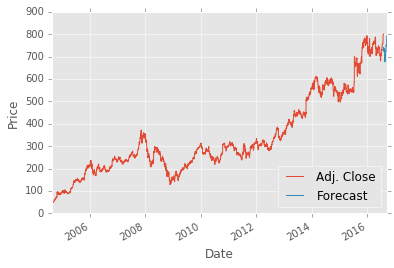

In [59]:
df['Forecast'] = np.nan

last_date     = df.iloc[-1].name
last_unix     = time.mktime(last_date.timetuple())
one_day       = 86400 #num seconds in a day
next_unix     = last_unix + one_day

for i in forecast_set:
        next_date = datetime.datetime.fromtimestamp(next_unix)
        next_unix +=  one_day
        df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
        
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Pickling and Scaling

In [60]:
#clf.fit(X_train, y_train)

#call 'pickle' here to save our classifier
#with open('linear_regression_clf.pickle', 'wb') as f:
#     pickle.dump(clf, f)

#recover our classifier here
#pickle_in = open('linear_regression_clf.pickle','rb')
#clf = pickle.load(pickle_in)

## How Linear Regression works

**Y = mX+b** where **m** is the *slope* and  **b** is the *intercept*
To compute **m** .. m = {mean(X).mean(Y) - mean(X.Y)}/{(mean(X))^2 - mean(X²)}

b = mean(Y) - m.mean(X)

## How to Program the Best Fit Slope

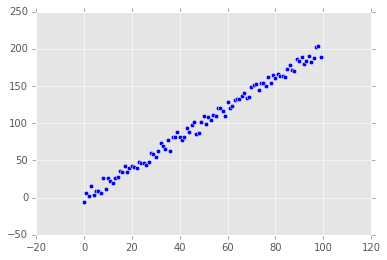

best fit m=: 2.01507350735  b=: 0.553861386139


In [61]:
def x_pow(xs):
    val = [i**2 for i in xs]
    return val

def xdoty(xs,ys):
    val = [i*j for i,j in zip(xs, ys)]
    return val

def best_fit_slope(xs, ys):
    x_bar = np.mean(xs)
    y_bar = np.mean(ys)
    xydot = xs*ys #xdoty(xs,ys)
    xs_2  = xs*xs
    #m = (x_bar*y_bar - np.mean(xydot))/(x_bar**2 - np.mean(x_pow(xs)))
    m = (x_bar*y_bar - np.mean(xydot))/(x_bar**2 - np.mean(xs_2))

    return m

def create_dataset(ds_size, variance, step=2, correlation=False):
    val = 1
    ys  = []
    
    for i in range(ds_size):
        y = val + np.random.randint(-variance, variance)
        ys.append(y)
        
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)
    
#xs = np.array([1,2,3,4,5,6], dtype = np.float64)
#ys = np.array([5,4,6,5,6,7], dtype = np.float64)

xs, ys = create_dataset(100, 10, correlation='pos')


plt.scatter(xs, ys)
plt.show()

m = best_fit_slope(xs, ys)
b = np.mean(ys) - m*np.mean(xs)
print 'best fit m=:', m, ' b=:',b

## How to Program the Best Fit Line

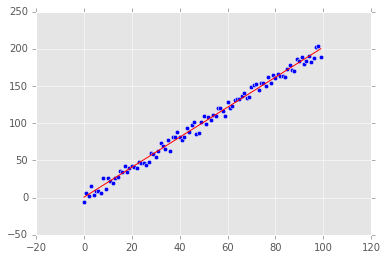

In [62]:
def best_fit_slope_and_intercept(xs,ys):
    m = best_fit_slope(xs, ys)
    b = np.mean(ys) - m*np.mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x) + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regression_line, color='red')
plt.show()

how accurate is the best fit line ?

## R Squared Theory

**accuracy = R²** - coefficient of determination

In [14]:
#computing squared error.. 

def squared_error(y_orig, ys_line):
    y_error_squared = [(y1-y2)**2 for y1,y2 in zip(y_orig, ys_line)]
    return sum(y_error_squared)

def coef_determination(y_orig, ys_line):
    y_mean_line     = [np.mean(y_orig) for _ in y_orig]
    squared_error_regr = squared_error(y_orig, ys_line)
    squared_error_y_mean = squared_error(y_orig, y_mean_line)
    
    return 1. - (squared_error_regr/squared_error_y_mean)


r_squared = coef_determination(ys, regression_line) 

print 'r_squared =:', r_squared

r_squared =: 0.99014789842


## Testing Assumptions

# Classification w/ K Nearest Neighbors Intro

## K Nearest Neighbors Application

In [63]:
#Get dataset from UC Irwine at
#http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
#either download it or use url fecthing..
'''
   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
'''
print (__doc__)
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()


   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)



,clump_thickness,unif_cell_size,unif_cell_shape,margin_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [66]:
#X-features, Y- labels
X  = np.array(df.drop(['class'], 1))
y  = np.array(df['class'])

print 'Len (X, Y) = (', len(X),',', len(y),')'
print 'Shape.X', X.shape, 'Shape.y', y.shape


X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.2)

#Classifier
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)              

#accuracy
accuracy = clf.score(X_test, y_test)              
print 'accuracy =:', accuracy*100              

Len (X, Y) = ( 699 , 699 )
Shape.X (699, 9) Shape.y (699,)
accuracy =: 96.4285714286


In [67]:
# predicting.. 

'''1. we take a random sample size that does not alredy exist in the data
This array can be a list of lists..'''
#example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = np.array([[4,2,1,1,1,2,3,2,1],
                             [4,3,1,2,3,2,2,3,2]])
example_measures = example_measures.reshape(len(example_measures),-1)

'''2. we call the classifier..'''
prediction = clf.predict(example_measures)
print 'prediction =:', prediction, ' with accuracy =:', accuracy*100

prediction =: [2 2]  with accuracy =: 96.4285714286


### Euclidean Distance

the **Euclidean distance** measures the **closeness** between neighbors

In [68]:
#the Euclidean distance measures the closeness between neighbors
def euclidean_distance(xs, ys):
    #by definition.. however it is not fast enough for large data sets
    #ec_dist = math.sqrt(sum([(x-y)**2 for x, y in zip(xs,ys)]))
    ec_dist = np.linalg.norm(np.array(xs)-np.array(ys))
    return ec_dist


### Creating a K Nearest Neighbors Algorithm

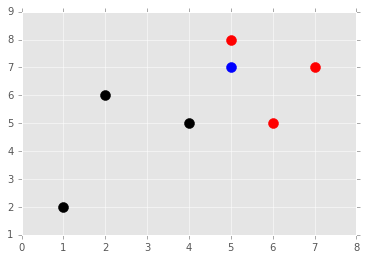

In [69]:
dataset = {'k':[[1,2],[4,5],[2,6]], 'r':[[6,5],[7,7],[5,8]]}

[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]

new_feature = [5,7]

plt.scatter(new_feature[0], new_feature[1], s=100,color='b')

plt.show()


In [70]:
import warnings
import collections
from collections import Counter

def k_nearest_neighbors(train_data, predict, k=3):
    if len(train_data) >= k:
        warnings.warn('K bust be less than the total voting groups')
    distances = []    
    for group in train_data:
        for features in train_data[group]:
            #ec_distance = np.linalg.norm(np.array(features)-np.array(predict))
            ec_distance = euclidean_distance(features, predict)
            distances.append([ec_distance, group])
     
    votes = [i[1] for i in sorted(distances)[:k]]
    
    #print (Counter(votes).most_common(1))
    
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence  = Counter(votes).most_common(1)[0][1]/k

    return vote_result, confidence

In [71]:
#testing the algorithm
result,_ = k_nearest_neighbors(dataset, new_feature, k=3)
print 'result K=3 :=', result

result K=3 := r


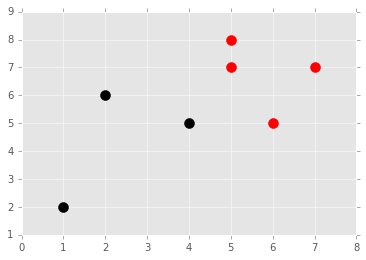

In [72]:
#plot the result from our algorithm
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]

new_feature = [5,7]

plt.scatter(new_feature[0], new_feature[1], s=100,color=result)

plt.show()

### Applying a K Nearest Neighbors Algorithm

In [73]:
#using the 'breast cancer dataset'
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

full_data = df.astype(float).values.tolist()

np.random.shuffle(full_data)

test_size       = 0.4
train_set       = {2: [], 4: []}
test_set        = {2: [], 4: []}

train_data = full_data[:-int(test_size*len(full_data))]
test_data  = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])
    
correct = 0.
total   = 0.
confidence_vec = []

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        
        if group == vote:
            correct += 1
        else:
            ''''''
        confidence_vec.append(confidence)
        
        total += 1

accuracy = correct / total        
print 'K-NNA accuracy =:',accuracy,  ' confidence =:', np.mean(confidence_vec)        


K-NNA accuracy =: 0.974910394265  confidence =: 0.89247311828


### Final Thoughts: K Nearest Neighbors

In [74]:
#use an iteraction and perform the test X times.. 

# SVM - Support Vector Machines: an Intro

In [81]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)
#df.head()
#X-features, Y- labels
X  = np.array(df.drop(['class'], 1))
y  = np.array(df['class'])

print 'Len (X, Y) = (', len(X),',', len(y),')'
print 'Shape.X', X.shape, 'Shape.y', y.shape

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.20)

#Classifier change to SVM
#clf = neighbors.KNeighborsClassifier()
clf = svm.SVC()
clf.fit(X_train, y_train)              

#accuracy
accuracy = clf.score(X_test, y_test)              
print 'SVM accuracy =:', accuracy 

Len (X, Y) = ( 699 , 699 )
Shape.X (699, 9) Shape.y (699,)
SVM accuracy =: 0.978571428571


In [82]:
# predicting.. with SVM instead of K-nearest neighbors

'''1. we take a random sample size that does not alredy exist in the data
This array can be a list of lists..'''
#example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = np.array([[4,2,1,1,1,2,3,2,1],
                             [4,3,1,2,3,2,2,3,2]])
example_measures = example_measures.reshape(len(example_measures),-1)

'''2. we call the classifier..'''
prediction = clf.predict(example_measures)
print 'prediction =:', prediction, ' with accuracy =:', accuracy*100,'%'

prediction =: [2 2]  with accuracy =: 97.8571428571 %


### Implementing a SVM Algorithm from Scratch

optimized a step.
optimized a step.
optimized a step.
(array([5, 1]), ':', 1.0479999999990506)
(array([ 6, -1]), ':', 1.7439999999985962)
(array([7, 3]), ':', 1.0479999999990506)
(array([1, 7]), ':', 1.2719999999994349)
(array([2, 8]), ':', 1.2719999999994349)
(array([3, 8]), ':', 1.0399999999995864)


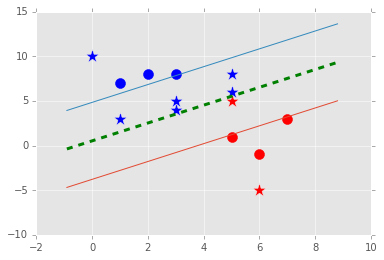

In [83]:
##
#
style.use('ggplot')
class SupportVectorMachine:
    
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        
        if self.visualization :
            self.fig = plt.figure()
            self.ax  = self.fig.add_subplot(1,1,1)
    '''fit.. '''
    def fit(self, data):
        self.data = data
        
        '''{ ||w||: [w,b]}'''
        opt_dict  = {}
        
        transforms = [[1,1], [-1,1], [-1,-1], [1,-1]]
        
        all_data   = []        
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        
        all_data = None
        
        
        step_sizes = [self.max_feature_value * 0.1, 
                      self.max_feature_value * 0.01, 
                      self.max_feature_value * 0.001
                     ]
        '''extrememly expensive'''
        b_range_multiple = 2
        '''no need to take as small of steps with b as we do w'''
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            ''' bcz it is a convex problem'''
            optimized = False
            
            ''' optimization loop'''
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple), 
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        
                        found_option = True
                        '''weakest link'''
                        '''constraint: yi(xi.w+b) >= 1'''
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t, xi)+b) >= 1:
                                    found_option = False
                        
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                
                '''....'''
                if w[0] < 0:
                    optimized = True
                    print 'optimized a step.'
                else:
                    w = w - step
            
            '''..'''
            norms = sorted([n for n in opt_dict])
            
            opt_choice = opt_dict[norms[0]]
            
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum  = opt_choice[0][0] + step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))              
    def predict(self, features):
        '''sign (x.w +b) '''
        classification = np.sign(np.dot(np.array(features), self.w) + self.b )
        
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, 
                            marker='*', c=self.colors[classification]) 
        else:
            print('featureset',features,'is on the decision boundary')
            

        return classification
    
    ''' visualize - '''
    def visualize(self):
        [[self.ax.scatter(x[0], x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        ''' hyperplane =: x.w + b'''
        ''' v = x.w + b
            pav = 1
            nav = -1
            dec = 0
        '''
        def hyperplane(x,w,b,v):            
            return (-w[0]*x - b + v) / (w[1])
        
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        
        hyper_x_min = datarange[0]
        hyper_x_max = datarange[1]
        
        ''' (w.x+b) =  1'''
        ''' positive support vector hyperplane'''
        psv1 = hyperplane(hyper_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyper_x_max, self.w, self.b, 1)
        
        self.ax.plot([hyper_x_min, hyper_x_max], [psv1, psv2])
        
        ''' (w.x+b) = -1'''
        ''' negative support vector hyperplane'''
        nsv1 = hyperplane(hyper_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyper_x_max, self.w, self.b, -1)
        
        self.ax.plot([hyper_x_min, hyper_x_max], [nsv1, nsv2])        
            
        ''' (w.x+b) = 0'''
        ''' zero support vector hyperplane'''
        db1 = hyperplane(hyper_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyper_x_max, self.w, self.b, 0)
        
        self.ax.plot([hyper_x_min, hyper_x_max], [db1, db2],'g--', lw=3)   
        
        plt.show()
            
'''here is the data to test'''    
data_dict = {-1: np.array([[1,7],[2,8],[3,8],]), 1: np.array([[5,1],[6,-1],[7,3]],)}

''' Time to test it.'''
svm = SupportVectorMachine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize() 
#svm.visualize()

   # Kernels:  Intro

In real world you might have  **no linearly separable data**

### Kernels, Soft Margin SVM, and Quadratic Programming with Python and CVXOPT

     pcost       dcost       gap    pres   dres
 0: -1.6453e+01 -3.1651e+01  5e+02  2e+01  2e+00
 1: -2.0002e+01 -1.5773e+01  2e+02  8e+00  7e-01
 2: -2.0082e+01 -8.6322e+00  8e+01  2e+00  2e-01
 3: -5.3493e+00 -4.6508e+00  9e+00  2e-01  2e-02
 4: -3.9762e+00 -4.0376e+00  2e+00  4e-02  4e-03
 5: -3.9177e+00 -3.9324e+00  3e-02  4e-04  4e-05
 6: -3.9309e+00 -3.9311e+00  3e-04  4e-06  4e-07
 7: -3.9311e+00 -3.9311e+00  3e-06  4e-08  4e-09
Optimal solution found.
3 support vectors out of 180 points
20 out of 20 predictions correct


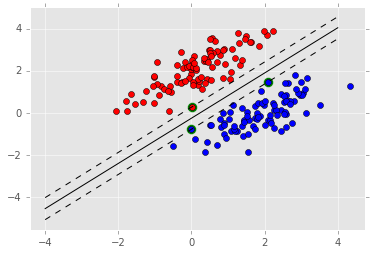

In [84]:
# Mathieu Blondel, September 2010
# License: BSD 3 clause
# http://www.mblondel.org/journal/2010/09/19/support-vector-machines-in-python/

# visualizing what translating to another dimension does
# and bringing back to 2D:
# https://www.youtube.com/watch?v=3liCbRZPrZA

# Docs: http://cvxopt.org/userguide/coneprog.html#quadratic-programming
# Docs qp example: http://cvxopt.org/examples/tutorial/qp.html

# Nice tutorial:
# https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf


import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

        
    test_linear()
    #test_non_linear()
    #test_soft()

     pcost       dcost       gap    pres   dres
 0: -4.2334e+01 -9.9785e+01  1e+03  4e+01  2e+00
 1: -9.2349e+01 -1.1895e+02  7e+02  2e+01  1e+00
 2: -5.3677e+01 -2.8197e+01  3e+02  9e+00  5e-01
 3: -1.1702e+00 -5.0484e-01  2e+01  3e-01  2e-02
 4: -1.3911e-01 -4.2773e-01  4e+00  7e-02  4e-03
 5: -1.1176e-01 -4.5360e-01  2e+00  4e-02  2e-03
 6: -3.5785e-02 -3.1859e-01  6e-01  6e-03  4e-04
 7: -8.1525e-02 -1.6566e-01  1e-01  9e-04  5e-05
 8: -9.9956e-02 -1.7691e-01  1e-01  5e-04  3e-05
 9: -1.2420e-01 -1.5453e-01  4e-02  2e-04  1e-05
10: -1.3368e-01 -1.4960e-01  2e-02  3e-05  2e-06
11: -1.4375e-01 -1.4715e-01  4e-03  3e-06  2e-07
12: -1.4658e-01 -1.4664e-01  7e-05  4e-08  3e-09
13: -1.4663e-01 -1.4663e-01  2e-06  8e-10  5e-11
14: -1.4663e-01 -1.4663e-01  4e-08  9e-12  5e-13
Optimal solution found.
8 support vectors out of 180 points
19 out of 20 predictions correct


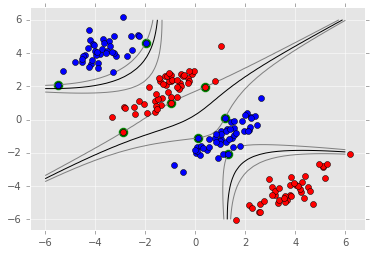

In [85]:
test_non_linear()

     pcost       dcost       gap    pres   dres
 0:  1.5961e+05 -8.5064e+07  2e+08  5e-01  9e-12
 1:  4.3759e+05 -1.4288e+07  2e+07  4e-02  9e-12
 2:  3.1595e+05 -3.0397e+06  4e+06  7e-03  6e-12
 3:  8.2203e+04 -6.6908e+05  8e+05  1e-03  4e-12
 4:  2.1648e+03 -1.1391e+05  1e+05  5e-05  4e-12
 5: -4.5184e+03 -1.7793e+04  1e+04  4e-06  4e-12
 6: -5.6348e+03 -1.7575e+04  1e+04  3e-06  4e-12
 7: -6.1526e+03 -1.6759e+04  1e+04  3e-06  4e-12
 8: -6.1812e+03 -1.1821e+04  6e+03  4e-12  5e-12
 9: -7.2420e+03 -1.0312e+04  3e+03  1e-12  6e-12
10: -7.9283e+03 -9.0422e+03  1e+03  1e-12  7e-12
11: -8.1608e+03 -8.6563e+03  5e+02  1e-12  6e-12
12: -8.2192e+03 -8.4934e+03  3e+02  5e-13  9e-12
13: -8.3330e+03 -8.3472e+03  1e+01  2e-12  9e-12
14: -8.3392e+03 -8.3393e+03  1e-01  3e-12  1e-11
15: -8.3392e+03 -8.3392e+03  1e-03  3e-12  8e-12
Optimal solution found.
12 support vectors out of 180 points
20 out of 20 predictions correct


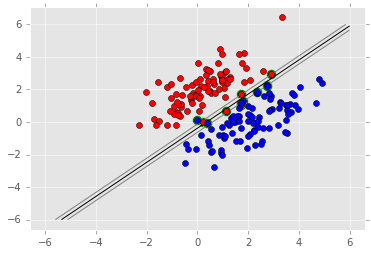

In [86]:
test_soft()

# Custering and Unsupervised Machine Learning: Intro

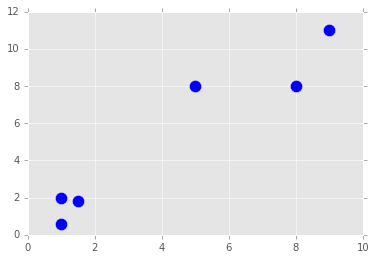

In [87]:
#

from sklearn.cluster import KMeans



X = np.array([[1,2], [1.5, 1.8], [5, 8], [8,8], [1, 0.6], [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

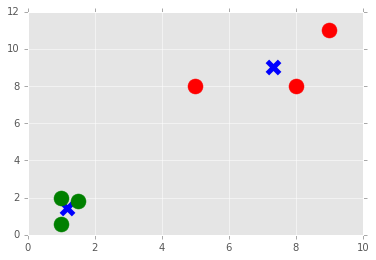

In [88]:
clf = KMeans(n_clusters=2)
clf.fit(X)

centroids = clf.cluster_centers_
labels    = clf.labels_

colors = ['g.', 'r.', 'k.', 'c.', 'b.',  'm.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 30)

plt.scatter(centroids[:,0], centroids[:, 1], marker='x', s=150, lw=5)    
plt.show()

### K Means with Titanic Dataset 

In [89]:
#https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''

df = pd.read_excel('titanic.xls')
#df.head(1)

In [90]:
df.drop(['body', 'name'], 1, inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
df.head()

/home/gonga/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


### Handling Non-Numeric Data

In [91]:
#convert non-numeric data to integers .. male-1, female -0
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
                    
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

df = handle_non_numeric_data(df)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,757,211.3375,31,2,1,248
1,1,1,0,0.9167,1,2,326,151.5500,158,2,19,348
2,1,0,1,2.0000,1,2,326,151.5500,158,2,0,348
3,1,0,0,30.0000,1,2,326,151.5500,158,2,0,348
4,1,0,1,25.0000,1,2,326,151.5500,158,2,0,348


In [92]:
### Now use the titanic data and classify it.
df.drop(['boat','sex'], 1, inplace=True)
''''''
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    
    prediction = clf.predict(predict_me)
    
    if prediction[0] == y[i]:
        correct += 1
        
print 'predict =:', 1.*correct/len(X)

predict =: 0.319327731092


## Custom K Means

Given a 2D plane with data, pick any two data points as the **starting** centroids, and measure the *euclidean distance* of every other data points to those points. Those who are the closest to we classify them as belonging to the class/cluster of that centroid. 

We then take the mean of all the points on a centroid and we get another centroid, and we proceed until the newest centroids do not move.

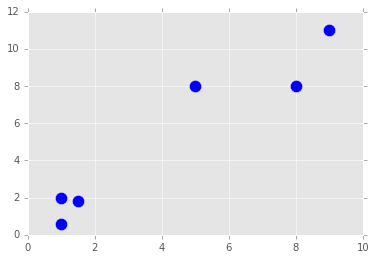

In [93]:
X = np.array([[1,2], [1.5, 1.8], [5, 8], [8,8], [1, 0.6], [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = ['g', 'r', 'k', 'c', 'b',  'm']

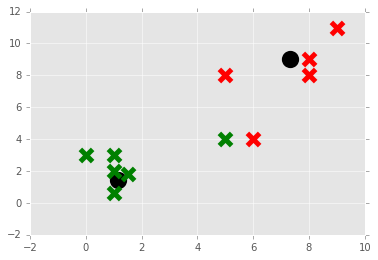

In [94]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k        = k
        self.tol      = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i]  = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            '''X here is the data above.. '''
            for featureset in data:
                distances =[np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                #pass
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid  = self.centroids[c]
                
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            
            if optimized:
                break
                
    
    def predict(self, data):
        distances  = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
'''Now testing'''
clf = K_Means(k=2)
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='k',s=150, lw=5)
    
for classification in clf.classifications:
    color = colors[classification]
    
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color = color, s=150, lw=5)

        
unknowns = np.array([[1,3],[8,9], [0,3], [5,4], [6,4]])        

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker='x',color = colors[classification], s=150,lw=5)
plt.show()        

In [95]:
# Using the TiTaNiC dataset
df = pd.read_excel('titanic.xls')
#df.head(1)

df.drop(['body', 'name'], 1, inplace=True)
#df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)


df = handle_non_numeric_data(df)

### add/remove features just to see impact they have.
df.drop(['boat','sex'], 1, inplace=True)

# 
#df.drop(['ticket','home.dest'], 1, inplace=True)
''''''
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = K_Means()
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    
    prediction = clf.predict(predict_me)
    
    if prediction == y[i]:
        correct += 1
        
print 'predict =:', 1.*correct/len(X)

predict =: 0.650114591291


## Mean Shift (Hierarchical Clustering)

Every point is a cluster... we also provide the **Radius** or _bandwidth_ - 

[[  4.27396628   3.62185346   6.93464936]
 [  3.03816619   1.00808513  10.33592912]
 [  0.73761838   1.30392318   1.10239781]]
('Number of estimated clusters:', 3)


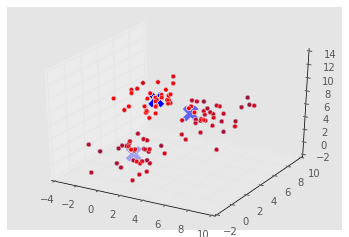

In [97]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,1,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    #ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')
    ax.scatter(X[:, 0], X[:, 1], X[:,2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

## Mean Shift with Titanic Dataset

In [98]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd
import matplotlib.pyplot as plt

'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''
print (__doc__)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df


# https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
df = pd.read_excel('titanic.xls')

original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)


df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

labels = clf.labels_
cluster_centers = clf.cluster_centers_

'''Next, we're going to add a new column to our original dataframe'''
original_df['cluster_group']=np.nan

for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / (1.0*len(temp_df))
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print ('survival rates =:', survival_rates)    


Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination



/usr/lib/python2.7/dist-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


('survival rates =:', {0: 0.3717948717948718, 1: 0.6595744680851063, 2: 1.0, 3: 0.1})


In [99]:
original_df[ (original_df['cluster_group']==2) ].head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cluster_group
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA",2
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",2
183,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN,2


## Mean Shift algorithm from scratch in Python

In [100]:
'''
Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

Seeding is performed using a binning technique for scalability.
'''
print __doc__


Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

Seeding is performed using a binning technique for scalability.



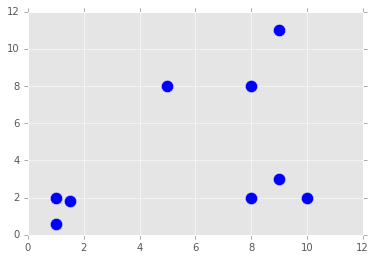

In [101]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]

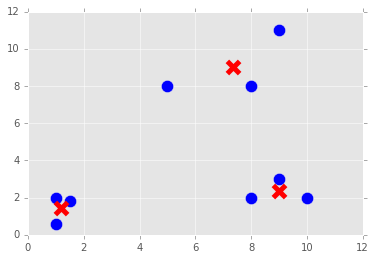

In [102]:


class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius
        
    def fit(self, data):
        centroids ={}
        
        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            
            for i in centroids:
                in_bandwidth = []
                centroid  = centroids[i]
                
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)
                
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
            
            ''''''
            uniques = sorted(list(set(new_centroids)))
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                    
            if optimized:
                break

        self.centroids = centroids
    
    def predict(self, data):
        pass
    
'''Test it here..'''
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])
clf = Mean_Shift(radius=4)
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)
#plt.show()

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], marker='x', color='r', s=150, lw=5)
plt.show()           

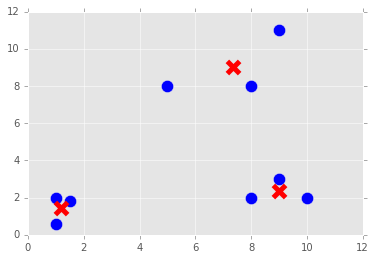

In [103]:
#now comparing with the sklearn version which is equivalent with the figure above for 'radius=2'
from sklearn.cluster import MeanShift

#in the classe above 'radius=bandwidth'
clf = MeanShift(bandwidth=4) 
clf.fit(X)

centroids = clf.cluster_centers_


plt.scatter(X[:,0], X[:,1], s=150)
#plt.show()

for i in range(len(centroids)):
    plt.scatter(centroids[i][0], centroids[i][1], marker='x', color='r', s=150, lw=5)
plt.show() 

## Mean Shift w Dynamic Bandwidth(Radius)

0.0471348006727
{0: array([ 2.63150701,  6.21318905]), 1: array([ 2.68589132,  0.72328078]), 2: array([ 7.96604923, -2.05508487])}


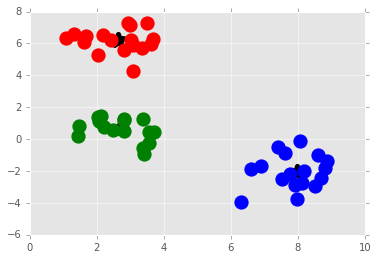

In [105]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

style.use('ggplot')

##X = np.array([[1, 2],
##              [1.5, 1.8],
##              [5, 8],
##              [8, 8],
##              [1, 0.6],
##              [9, 11],
##              [8, 2],
##              [10, 2],
##              [9, 3]])


##plt.scatter(X[:, 0],X[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
##plt.show()

'''
1. Start at every datapoint as a cluster center

2. take mean of radius around cluster, setting that as new cluster center

3. Repeat #2 until convergence.

'''

class Mean_Shift:
    def __init__(self, radius = None, radius_norm_step = 100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    
    def fit(self,data):

        if self.radius == None:
            all_data_centroid = np.average(data,axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm/self.radius_norm_step
            print(self.radius)

        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]

        weights = [i for i in range(self.radius_norm_step)][::-1]    
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:

                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                        #distance = 0.001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1

                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth +=to_add

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            to_pop = []

            for i in uniques:
                for ii in [i for i in uniques]:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        #print(np.array(i), np.array(ii))
                        to_pop.append(ii)
                        break

            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass

            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False

            if optimized:
                break
            
        self.centroids = centroids
        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            #compare distance to either centroid
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            #print(distances)
            classification = (distances.index(min(distances)))

            # featureset that belongs to that cluster
            self.classifications[classification].append(featureset)


    def predict(self,data):
        #compare distance to either centroid
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = (distances.index(min(distances)))
        return classification

'''Testing the algorithm'''

X, y = make_blobs(n_samples=50, centers=3, n_features=2)    

clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids
print(centroids)

colors = 10*['r','g','b','c','k','y']

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker = "o", color=color, s=150, linewidths = 2, zorder = 10)

for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1], color='k', marker = "*", s=150, linewidths = 5)

plt.show()